# Basic RL Setup

You create an environment and an agent

## Environment

The environment dictates:

1. what types of actions you can perform
2. What's the state of the system
3. Whether the game or episode is done

## Agent

The agent takes in an environment and decides to perform an action within it based off it's state

In [ ]:
import random
from typing import List

class Environment:
    def __init__(self):
        self.steps_left = 10
        
    def get_observation(self) -> List[float]:
        """return current environment state"""
        return [0.0, 0.0, 0.0]

    def get_actions(self) -> List[int]:
        return [0, 1]
    
    def is_done(self) -> bool:
        return self.steps_left == 0
    
    def action(self, action: int) -> float:
        if self.is_done():
            raise Exception("Game is over")
        
        self.steps_left -= 1
        return random.random()

class Agent:
    def __init__(self):
        self.total_reward = 0.0
    
    def step(self, env: Environment):
        """
        1. observe the environment
        2. make a decision about the action to take based on the observations
        3. submit the action to the environment
        4. get the reward for the current step
        """
        current_obs = env.get_observation()
        actions = env.get_actions()
        reward = env.action(random.choice(actions))
        self.total_reward += reward
        
env = Environment()
agent = Agent()

while not env.is_done():
    agent.step(env)
    
    print(f'total reward {agent.total_reward}')

# CartPole

## Observation

4 floating point numbers containing information about:

1. the x-coordinate of the stick's center of mass
2. its speed
3. angle to the platform
4. angular speed


In [12]:
env = gym.make('CartPole-v0')
total_reward = 0.0
total_steps = 0
obs = env.reset()

obs

array([ 0.01975619, -0.02326367,  0.04264992,  0.01020286])

## Reward

Reward is 1 until the stick falls

## Action space

Discrete 2-valued, either 0 or 1. 0 means push cart left, 1 means push cart right.

In [29]:
print(env.action_space)

# sample the action space, may be useful if you don't know what to do
env.action_space.sample()

Discrete(2)


1

## Observation space

After every action, you get the new observation, reward, and a done flag to tell you if the game is over

In [27]:
print(env.step(0)) # 0 = observation, 1 = reward, 2 = game done?, 3 = extra information

env.observation_space.sample() # not really useful, but you can sample the observation space

(array([-0.24441929, -2.37079652,  0.4652792 ,  4.01682322]), 0.0, True, {})


array([ 3.8170819e+00,  3.2603339e+38, -7.9313731e-03, -9.3532748e+37],
      dtype=float32)

## Full Simple CartPole Example

Simple CartPole example with random actions

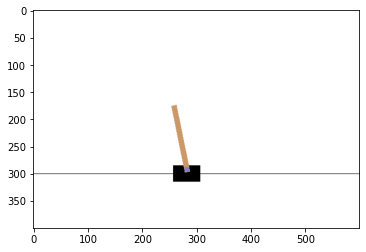

Episode one in 35 steps, total_reward 35.0


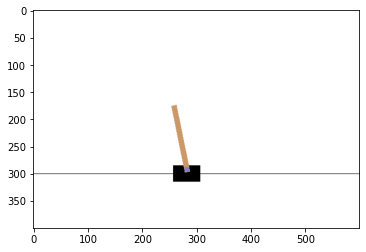

In [30]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline


env = gym.make('CartPole-v0')
total_reward = 0.0
total_steps = 0
obs = env.reset()

while True:
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    action = env.action_space.sample() # randomly act
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    
    if done:
        break

print(f'Episode one in {total_steps} steps, total_reward {total_reward}')

Box(4,)